# Importing the libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

Using TensorFlow backend.


# Loading the dataset

In [0]:
df = pd.read_csv("drive/My Drive/poster/sp1/normalized_energy_efficiency_dataset.csv")

In [0]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,0.000000,0.285714,0.000000,7.0,2,0.0,0,15.55,21.33
1,0.98,0.000000,0.285714,0.000000,7.0,3,0.0,0,15.55,21.33
2,0.98,0.000000,0.285714,0.000000,7.0,4,0.0,0,15.55,21.33
3,0.98,0.000000,0.285714,0.000000,7.0,5,0.0,0,15.55,21.33
4,0.90,0.166667,0.428571,0.111111,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,0.916667,0.571429,1.000000,3.5,5,0.4,5,17.88,21.40
764,0.62,1.000000,0.714286,1.000000,3.5,2,0.4,5,16.54,16.88
765,0.62,1.000000,0.714286,1.000000,3.5,3,0.4,5,16.44,17.11
766,0.62,1.000000,0.714286,1.000000,3.5,4,0.4,5,16.48,16.61


# Creating the Random Forest for heating load

In [0]:
'''
Aqui cargamos las variables vamos a utilizar las 7 variables como variables 
de entrenamiento y una unica variable (heating load) como la que queremos predecir
'''
X = df.iloc[:, 0:8].values
y = df.iloc[:, 8:9].values

In [0]:
'''
Partimos el dataset en training y testing con una proporción de 
20% para testing y 80% para training
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# Verificamos el shape para ver si tenemos la cantidad correcta de variables para entrenar
X.shape

(768, 8)

In [8]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
feature_importances = pd.DataFrame(regressor.feature_importances_,
                                   index = df.iloc[:, 0:8].columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [10]:
feature_importances

,importance
Relative Compactness,0.434540
Surface Area,0.187673
Roof Area,0.159312
Glazing Area,0.080610
Overall Height,0.079445
Wall Area,0.050148
Glazing Area Distribution,0.007536
Orientation,0.000736


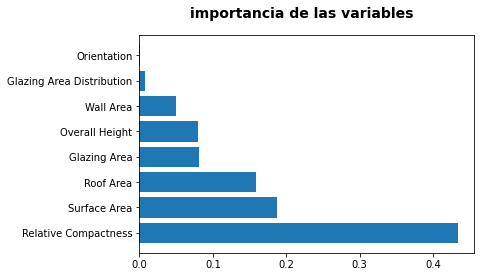

In [42]:
fig = plt.figure()
fig.suptitle('importancia de las variables', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.barh(feature_importances.index, feature_importances.importance)
# plt.barh(feature_importances.index, feature_importances.importance)
# plt.show()
plt.savefig('drive/My Drive/poster/sp1/feature_importance.png', bbox_inches="tight")

In [11]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([15.153 , 10.419 , 36.194 , 17.016 , 32.448 , 29.204 , 28.382 ,
       29.184 , 28.808 , 23.523 ,  6.3762, 42.668 , 11.367 , 41.96  ,
       41.098 , 25.674 , 10.674 , 29.294 , 14.358 , 12.453 , 12.692 ,
       32.732 , 10.694 , 39.414 ,  6.0576, 14.656 , 12.852 , 13.873 ,
       10.695 , 39.754 , 12.731 , 12.9   , 41.74  , 12.946 , 28.568 ,
       36.917 , 14.235 , 36.828 , 17.126 , 10.563 , 11.536 , 39.943 ,
       14.556 , 25.872 , 19.077 , 24.291 , 10.694 , 12.699 , 28.32  ,
       31.862 , 32.54  , 12.947 , 32.818 , 15.149 , 36.917 , 10.387 ,
       17.701 , 27.077 , 38.875 , 14.531 , 14.938 , 12.404 , 32.462 ,
       10.378 , 12.61  , 12.148 , 39.319 , 11.207 , 26.186 , 39.433 ,
       32.725 , 10.679 , 23.704 , 17.168 , 15.223 , 25.868 , 32.662 ,
       39.03  , 32.66  , 14.558 , 36.326 , 28.945 , 11.683 , 14.133 ,
       28.811 , 25.779 , 24.104 , 29.67  , 12.86  , 17.168 , 14.46  ,
       26.128 , 12.42  , 24.452 , 40.601 , 16.819 , 29.062 , 14.588 ,
        7.087 , 36.7

In [0]:
'''
 Creamos un dataframe que contenga los resultados reales del testing y los 
 resultados de la prediccion que realizamos esto es para luego poder calcular
 el mse, rmse, mae
'''
df_heat = pd.DataFrame()

In [0]:
df_heat['original_values'] = y_test.flatten()
df_heat['Predicted_Values'] = y_pred

In [14]:
df_heat

,original_values,Predicted_Values
0,15.18,15.153
1,10.32,10.419
2,37.26,36.194
3,16.95,17.016
4,32.26,32.448
...,...,...
149,14.33,14.140
150,28.15,28.362
151,11.33,11.413
152,13.86,14.141


In [15]:
'''
Todos los calculos que se van a realizar posteriormente 
nos ayudaran a poder ver el performance del modelo
'''

# Calculamos el Mean squared Error
mse_heat = mean_squared_error(df_heat['original_values'], df_heat['Predicted_Values'])
mse_heat

0.349355397402597

In [16]:
# Calculamos el Mean Absolute Error
mae_heat = mean_absolute_error(df_heat['original_values'], df_heat['Predicted_Values'])
mae_heat

0.3749766233766229

In [17]:
# Calculamos el Root Mean Squared Error 
root_mean_squared_error = sqrt(mse_heat)
root_mean_squared_error

0.5910629386136446

Text(0, 0.5, 'Heating Load')

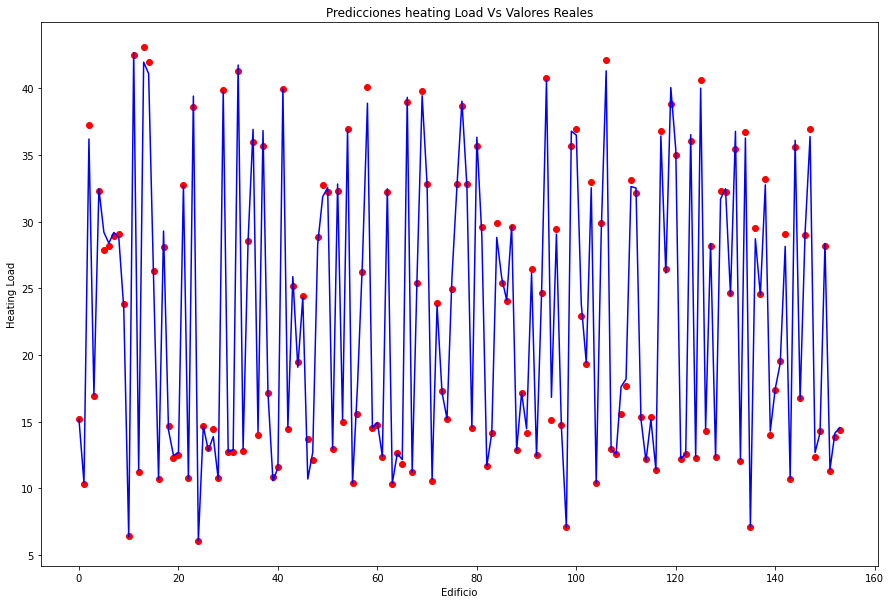

In [18]:
'''
Esta grafica nos ayudara a poder visualizar los resultado de nuestro 
modelo, tenemos dos graficas una que tiene una linea (azul) que esta 
representa los valores predichos esta nos ayuda a poder ver las predicciones
y ver como es su comportamiento.

En la segunda grafica podemos observar las predicciones pero ahora en un 
scatterplot y esto nos ayudara a confirmar si estamos haciendo 
overfitting y si que tanto se alinean nuestras predicciones 
con el valor real.
'''
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test.size), y_test, color = 'red')
ax.plot(np.arange(0, y_test.size), y_pred, color = 'blue')
plt.title('Predicciones heating Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Heating Load')

Text(0, 0.5, 'Heating Load')

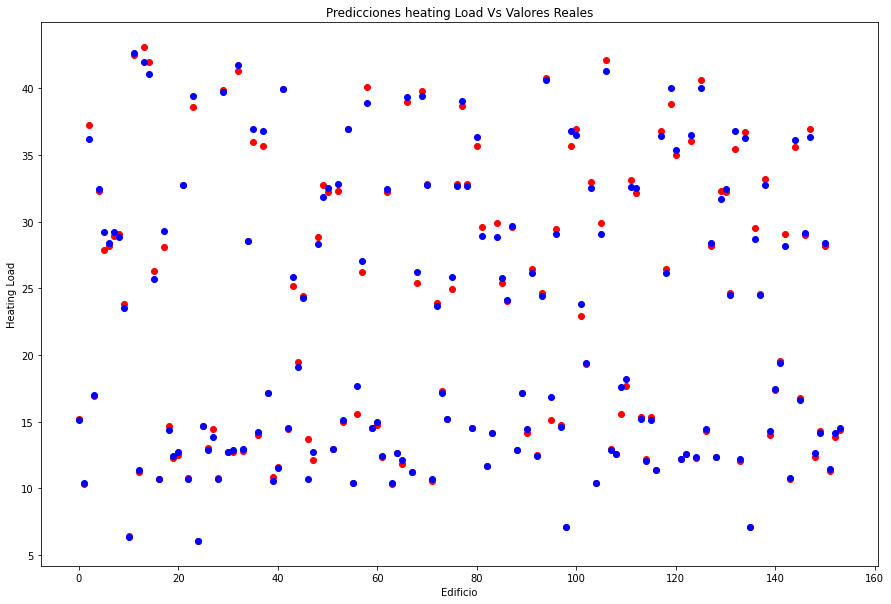

In [19]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test.size), y_test, color = 'red')
ax.scatter(np.arange(0, y_test.size), y_pred, color = 'blue')
plt.title('Predicciones heating Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Heating Load')

# Creating the ensemble for cooling load

In [0]:
'''
Aqui cargamos las variables vamos a utilizar las 7 variables como variables 
de entrenamiento y una unica variable (cooling load) como la que queremos predecir
'''
X_cooling= df.iloc[:, 0:8].values
y_cooling = df.iloc[:, 9:10].values

In [0]:
'''
Partimos el dataset en training y testing con una proporción de 
20% para testing y 80% para training
'''
X_train_cooling, X_test_cooling, y_train_cooling, y_test_cooling = train_test_split(X_cooling, y_cooling, test_size = 0.2, random_state = 0)

In [22]:
# Verificamos el shape para ver si tenemos la cantidad correcta de variables para entrenar
X_cooling.shape

(768, 8)

In [23]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
cooling_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
cooling_regressor.fit(X_train_cooling, y_train_cooling)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [24]:
# Predicting the Test set results
y_pred_cooling = cooling_regressor.predict(X_test_cooling)
y_pred_cooling

array([17.424, 13.607, 36.722, 23.214, 32.395, 30.072, 29.589, 29.064,
       33.233, 27.087, 11.341, 39.543, 14.635, 40.822, 44.053, 29.248,
       14.216, 29.84 , 14.62 , 15.082, 15.582, 32.287, 13.83 , 43.192,
       11.05 , 17.141, 14.005, 16.493, 14.071, 38.184, 14.185, 15.938,
       43.244, 15.989, 29.568, 36.66 , 16.028, 36.558, 17.071, 16.795,
       13.925, 37.291, 17.268, 27.186, 25.023, 25.676, 14.026, 15.833,
       32.902, 33.294, 33.002, 14.391, 34.012, 17.664, 36.686, 13.543,
       21.769, 27.728, 40.397, 17.125, 18.346, 14.878, 33.434, 13.411,
       15.389, 14.762, 43.142, 14.341, 29.271, 38.759, 33.297, 14.206,
       27.237, 17.09 , 19.338, 27.121, 33.1  , 43.362, 33.161, 16.802,
       36.152, 31.416, 14.032, 14.822, 32.488, 27.305, 26.175, 32.144,
       14.19 , 17.157, 17.112, 29.579, 15.248, 25.762, 39.961, 17.272,
       29.934, 16.559, 12.458, 36.818, 37.491, 27.43 , 24.716, 33.986,
       13.487, 33.437, 40.652, 16.106, 15.206, 22.209, 20.26 , 33.978,
      

In [0]:
'''
 Creamos un dataframe que contenga los resultados reales del testing y los 
 resultados de la prediccion que realizamos esto es para luego poder calcular
 el mse, rmse, mae
'''
df_cooling = pd.DataFrame()

In [0]:
df_cooling['original_values'] = y_test_cooling.flatten()
df_cooling['Predicted_Values'] = y_pred_cooling

In [27]:
df_cooling

,original_values,Predicted_Values
0,17.63,17.424
1,13.57,13.607
2,34.62,36.722
3,21.16,23.214
4,33.34,32.395
...,...,...
149,15.41,15.261
150,30.00,30.263
151,15.00,14.606
152,14.75,14.546


In [28]:
'''
Todos los calculos que se van a realizar posteriormente 
nos ayudaran a poder ver el performance del modelo
'''

# Calculamos el Mean squared Error
mse_cooling = mean_squared_error(df_cooling['original_values'], df_cooling['Predicted_Values'])
mse_cooling

2.4614931818181804

In [29]:
# Calculamos el Mean Absolute Error
mae_cooling = mean_absolute_error(df_cooling['original_values'], df_cooling['Predicted_Values'])
mae_cooling

0.9436233766233765

In [30]:
# Calculamos el Root Mean Squared Error 
root_mean_squared_error = sqrt(mse_cooling)
root_mean_squared_error

1.5689146509030312

Text(0, 0.5, 'Cooling Load')

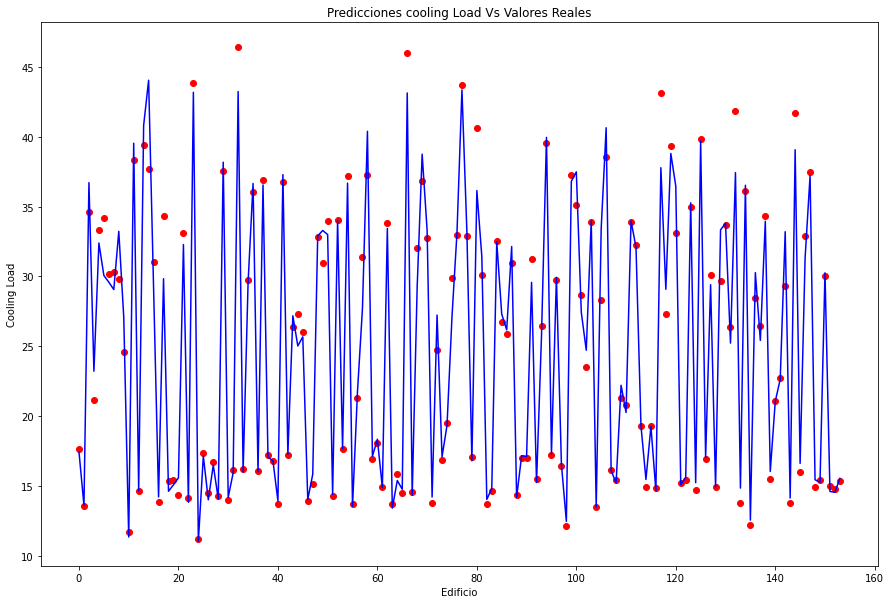

In [31]:
'''
Esta grafica nos ayudara a poder visualizar los resultado de nuestro 
modelo, tenemos dos graficas una que tiene una linea (azul) que esta 
representa los valores predichos esta nos ayuda a poder ver las predicciones
y ver como es su comportamiento.

En la segunda grafica podemos observar las predicciones pero ahora en un 
scatterplot y esto nos ayudara a confirmar si estamos haciendo 
overfitting y si que tanto se alinean nuestras predicciones 
con el valor real.
'''
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test_cooling.size), y_test_cooling, color = 'red')
ax.plot(np.arange(0, y_test_cooling.size), y_pred_cooling, color = 'blue')
plt.title('Predicciones cooling Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Cooling Load')

Text(0, 0.5, 'Cooling Load')

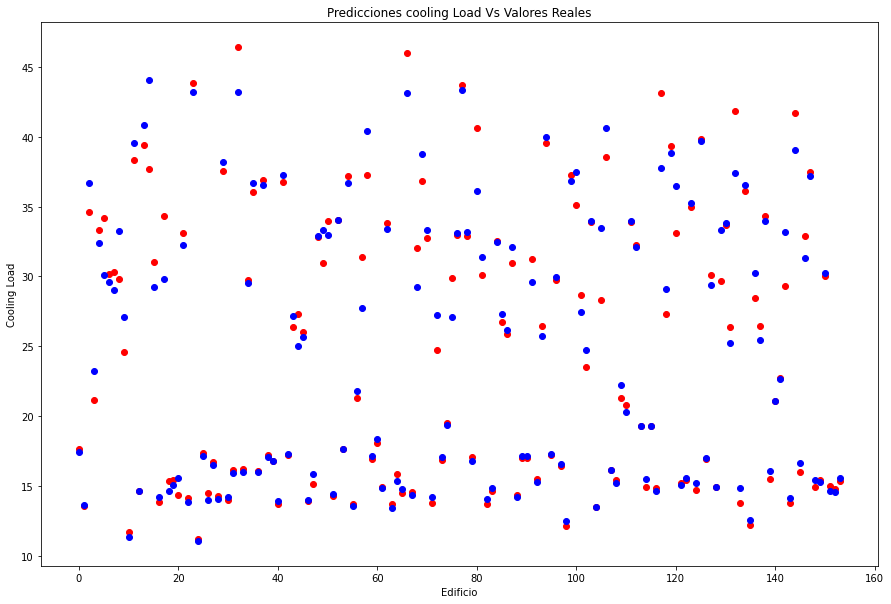

In [32]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test_cooling.size), y_test_cooling, color = 'red')
ax.scatter(np.arange(0, y_test_cooling.size), y_pred_cooling, color = 'blue')
plt.title('Predicciones cooling Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Cooling Load')